      X1   X2     X3        Y
0   2.03  140    0.5  0.87850
1   2.03  140    1.5  0.87000
2   2.03  140   24.0  0.85400
3   2.03  140   72.0  0.83400
4   2.03  140  144.0  0.83090
..   ...  ...    ...      ...
75  6.69  200    0.5  0.70813
76  6.69  200    1.5  0.67731
77  6.69  200   24.0  0.67510
78  6.69  200   72.0  0.67510
79  6.69  200  144.0  0.61622

[80 rows x 4 columns]
원 데이터 :  (80, 1)
2차항 변환 데이터 :  (80, 3)
기울기 a :  [[ 0.          0.14575495 -0.00182653]]
y절편 :  [-1.7705508]
결정계수 :  0.6988993555777747


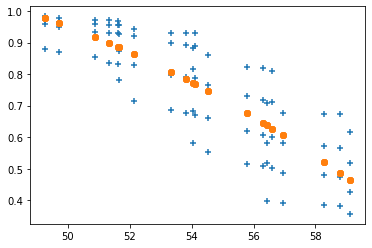

In [2]:
from sklearn.linear_model import LinearRegression
#2차 함수를 만들기 위한 import 
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plot
import numpy as np
import sklearn
import pandas as pd
import openpyxl
#plot.rcParams["font.family"] = 'Malgun gothic'

data = pd.read_excel("Nd-Ce.xlsx", header=1)
print(data)
newData = data[['X1', 'X2', 'X3', 'Y']]

#단순 회귀 모델 생성
model = LinearRegression()

#속성(변수)선택
temperature = newData['X2']
time = np.log(newData['X3'])
newData['LMP'] = (temperature +273)*(time +120)/1000
x= newData[['LMP']]

y = newData[['Y']]
#변환
poly = PolynomialFeatures(degree = 2) # 2차함수 적용
x_poly = poly.fit_transform(x) # 데이터를 2차식으로 변형

model.fit(x_poly, y)

#예측 모델 생성
y_p = model.predict(x_poly)

#출력
print('원 데이터 : ', x.shape)
print('2차항 변환 데이터 : ', x_poly.shape)
#print(x_poly)
#기울기와 y절편 출력
print('기울기 a : ', model.coef_)
print('y절편 : ', model.intercept_)

#결정계수
relation_square = model.score(x_poly, y)
print('결정계수 : ', relation_square)

#그래프로 나타내기 
plot.scatter(x, y, marker = '+')
plot.scatter(x, y_p, marker = 'o')
plot.show()